In [20]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from spafe.features import gfcc
import librosa
import librosa.display
import pandas as pd
import seaborn as sns


# Load dataset

In [21]:
path = "AudioData/"
folder_list = ['DC/', 'JE/', 'JK/', 'KL/']

data = []
label = []
for folder in folder_list:
    for file in os.listdir(path + folder):
        file_path = os.path.join(path, folder, file)
        rate, record = wavfile.read(file_path) # rate = 44100, record = (N,)
        data.append(record)
        label.append(re.findall('([a-z]+)', file.split('.')[0]))
label = np.stack(label)
print(data[2].shape)

(192302,)


# EDA

In [22]:
label_df = pd.DataFrame(label, columns=['label'])
len(label_df)


480

/Users/xinying/opt/anaconda3/envs/SER/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'distribution of data of differnt emotions'}, xlabel='label', ylabel='count'>

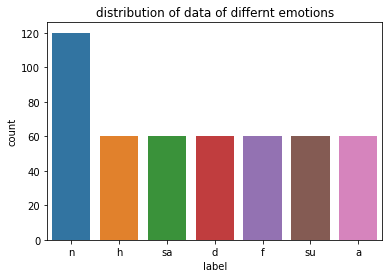

In [23]:
plt.title('distribution of data of differnt emotions')
sns.countplot(label_df['label'])

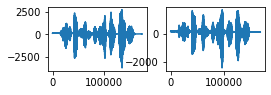

In [24]:
# visualize audio dataset
# angry
rate, record_a = wavfile.read(path + 'KL/' + 'a01.wav')
ax1 = plt.subplot(331)
ax1.plot(record_a)


# disgust
rate, record_d = wavfile.read(path + 'KL/' + 'd01.wav')
ax2 = plt.subplot(332)
ax2.plot(record_d)


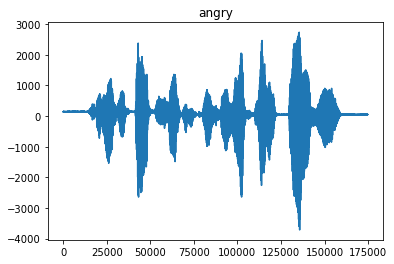

In [25]:
plt.title("angry")
plt.plot(record_a)
# X = librosa.stft(record_a)
# librosa.display.specshow(X)


# feature extraction

In [33]:
# gfcc-17 extraction
gfcc_feature = np.zeros((len(data), 1,17,))
for id, d in enumerate(data):
    print(id)
    print(d.shape)

    gfcc_feature[id,:,:] = gfcc.gfcc(d, fs = rate, num_ceps = 17,win_len = 0.020,nfft = 2048)




0
(152547,)


ValueError: could not broadcast input array from shape (344,17) into shape (1,17)

In [29]:
d1 = gfcc.gfcc(data[0], fs = rate, num_ceps = 17,win_len = 0.020,nfft = 2048)
d1.shape

(344, 17)

In [30]:
d2 = gfcc.gfcc(data[1], fs = rate, num_ceps = 17,win_len = 0.020,nfft = 2048)
d2.shape

(204, 17)

In [ ]:

gfcc_model = np.zeros((1,17))     # inital array of gfcc model
shape = np.zeros((1,7),dtype = int)    # record the number of frames of each sentiment
  

for index,x in enumerate(PATH):     # for each sentiment:
    for filename in os.listdir(x):  # for each file in each sentiment
       rate,audio = wavfile.read(os.path.join(x,filename))    
       gfcc_feat= gfcc(audio, fs = rate, num_ceps = 17,win_len = 0.020,nfft = 2048)
       gfcc_model = np.vstack((gfcc_model, gfcc_feat))    # add the new frame into gfcc model array
    shape[0,index] = gfcc_model.shape[0]    #record the number of frames of each sentiment
    print(shape)

# set up target  
labels = np.zeros((gfcc_model.shape[0]-1,))   
for index in range(6):
    labels[shape[0,index]-1:shape[0,index+1]-1] = index+1

gfcc_model = np.delete(gfcc_model,0, axis = 0) # delete the first inital 0 row

# print model and target
print(gfcc_model)
print(gfcc_model.shape)
print(labels.shape)


# save mfcc array and labels as npy file 
np.save('data17.npy',gfcc_model)
np.save('target17.npy',labels)